# First analyze of data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Getting data from file:

In [2]:
data = pd.read_json('_data/all_data.json')

In [3]:
data.head()

,game name,records,id,languages,avg viewers,avg hours,average place,amount in top
0,Just Chatting,394,509658,15,8962.332487,5.845590,1.238095,21
1,VALORANT,389,516575,12,5564.159383,5.512022,3.571429,21
2,League of Legends,398,21779,14,6729.306533,5.752093,3.619048,21
3,Counter-Strike Global Offensive,397,32399,17,6396.075567,6.296331,5.666667,21
4,Grand Theft Auto V,394,32982,19,2412.241117,6.000097,5.952381,21


In [4]:
data.describe()

,records,id,languages,avg viewers,avg hours,average place,amount in top
count,3373.000000,3.373000e+03,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,65.664690,3.864390e+08,4.908983,151.638576,5.622130,622.824215,5.819152
std,118.152923,6.295579e+08,5.232978,613.032446,3.945565,246.944544,6.661394
min,1.000000,5.500000e+01,1.000000,1.000000,2.031667,1.238095,1.000000
25%,1.000000,3.295900e+04,1.000000,15.035714,3.923611,463.000000,1.000000
50%,5.000000,5.091100e+05,2.000000,33.666667,4.566389,665.000000,2.000000
75%,54.000000,6.616389e+08,7.000000,77.136364,5.819766,814.000000,8.000000
max,400.000000,2.147244e+09,25.000000,10111.000000,49.790833,1020.000000,21.000000


Checking for missing data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game name      3373 non-null   object 
 1   records        3373 non-null   int64  
 2   id             3373 non-null   int64  
 3   languages      3373 non-null   int64  
 4   avg viewers    3373 non-null   float64
 5   avg hours      3373 non-null   float64
 6   average place  3373 non-null   float64
 7   amount in top  3373 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 210.9+ KB


In [6]:
data.isnull().sum()

game name        0
records          0
id               0
languages        0
avg viewers      0
avg hours        0
average place    0
amount in top    0
dtype: int64

Histograms for specific data:

Average place:

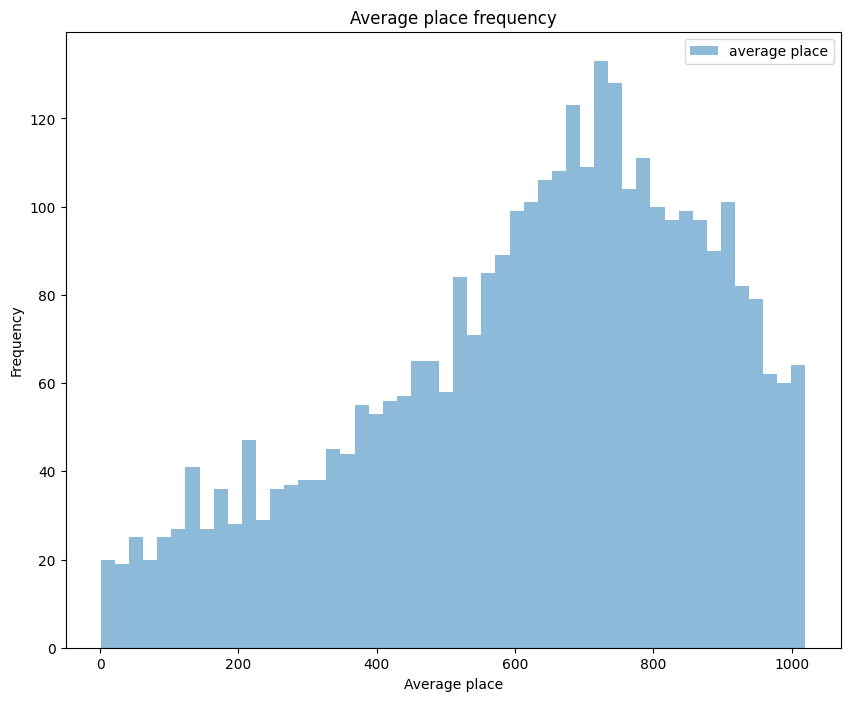

In [7]:
plt.figure(figsize=(10, 8))
plt.hist(data['average place'], bins=50, alpha=0.5, label='average place')


plt.xlabel('Average place')
plt.ylabel('Frequency')
plt.title('Average place frequency')
plt.legend()
plt.show()

More accurate histogram for most frequent values:

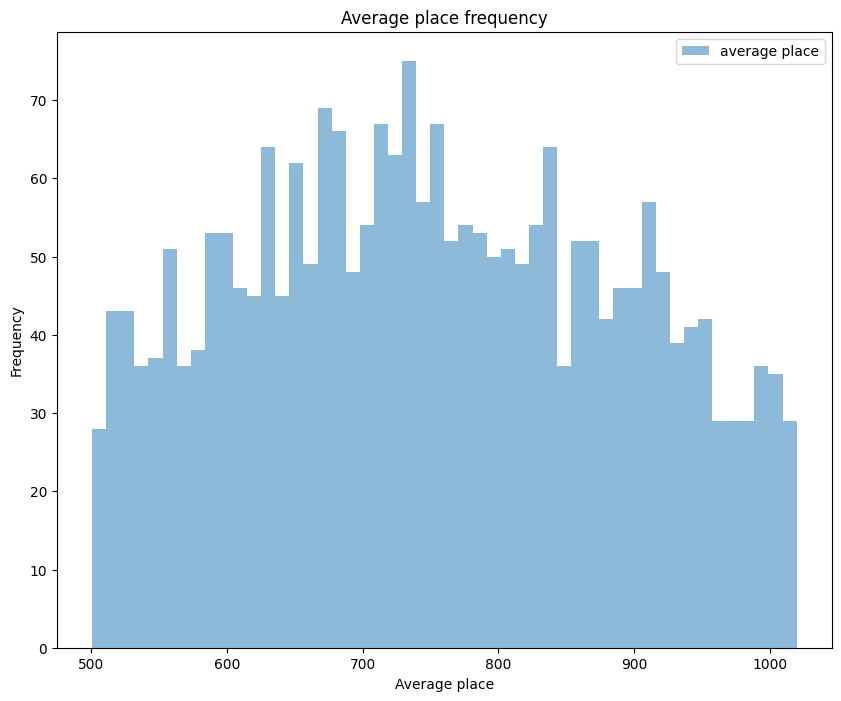

In [8]:
plt.figure(figsize=(10, 8))
filtered_values = data['average place'][data['average place'] > 500]
plt.hist(filtered_values, bins=50, alpha=0.5, label='average place')


plt.xlabel('Average place')
plt.ylabel('Frequency')
plt.title('Average place frequency')
plt.legend()
plt.show()

Average amount of viewers:

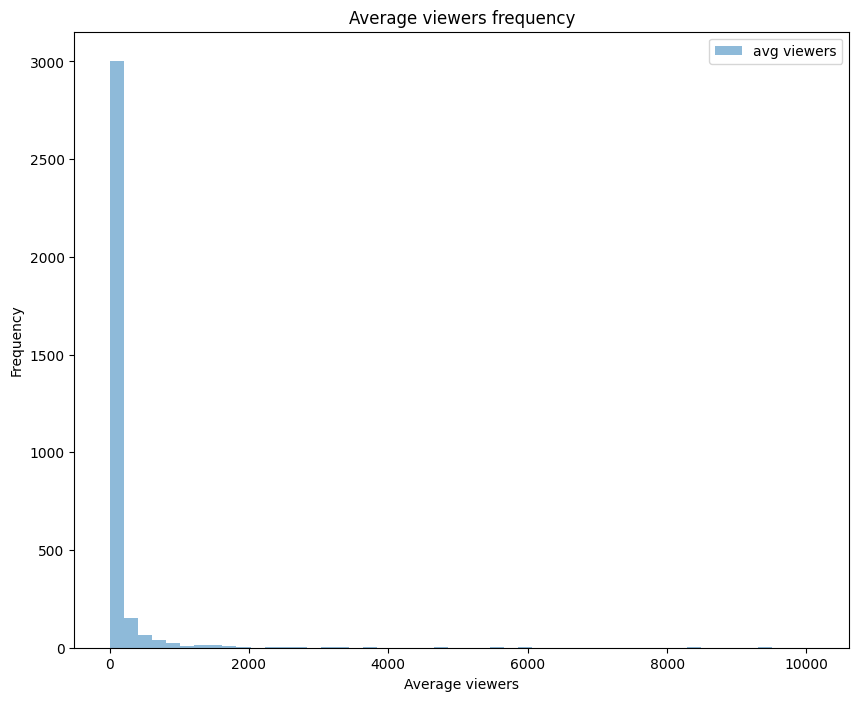

In [9]:
plt.figure(figsize=(10, 8))
filtered_values = data['avg viewers'][data['avg viewers'] < 500]
plt.hist(data['avg viewers'], bins=50, alpha=0.5, label='avg viewers')


plt.xlabel('Average viewers')
plt.ylabel('Frequency')
plt.title('Average viewers frequency')
plt.legend()
plt.show()

More accurate histogram for most frequent values:

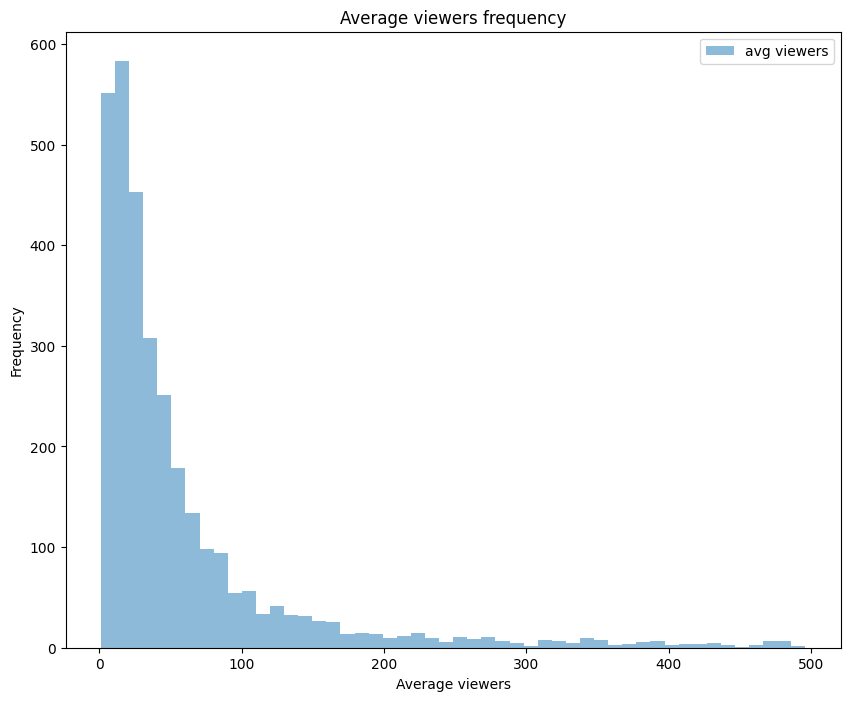

In [10]:
plt.figure(figsize=(10, 8))
filtered_values = data['avg viewers'][data['avg viewers'] < 500]
plt.hist(filtered_values, bins=50, alpha=0.5, label='avg viewers')


plt.xlabel('Average viewers')
plt.ylabel('Frequency')
plt.title('Average viewers frequency')
plt.legend()
plt.show()

Average amount of streamed hours:

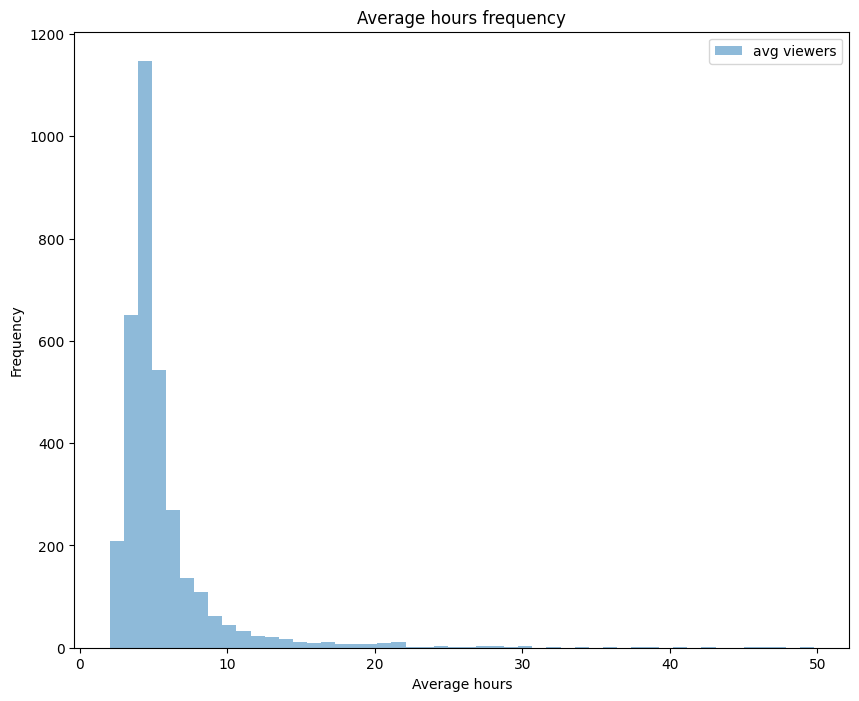

In [11]:
plt.figure(figsize=(10, 8))
plt.hist(data['avg hours'], bins=50, alpha=0.5, label='avg viewers')


plt.xlabel('Average hours')
plt.ylabel('Frequency')
plt.title('Average hours frequency')
plt.legend()
plt.show()

More accurate histogram for the most frequent values:

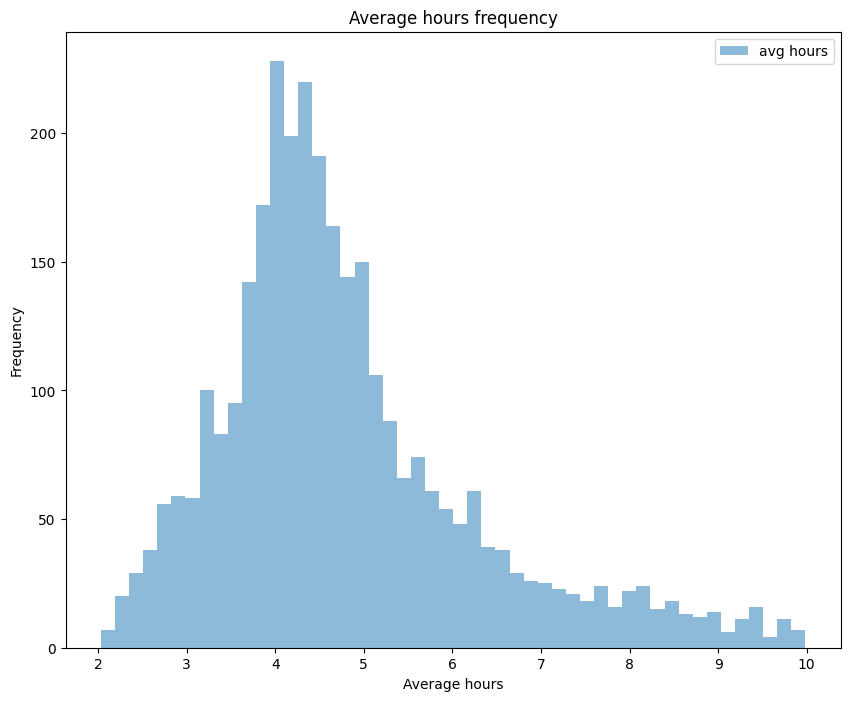

In [12]:
plt.figure(figsize=(10, 8))
filtered_values = data['avg hours'][data['avg hours'] < 10]
plt.hist(filtered_values, bins=50, alpha=0.5, label='avg hours')


plt.xlabel('Average hours')
plt.ylabel('Frequency')
plt.title('Average hours frequency')
plt.legend()
plt.show()

Number of records of game:

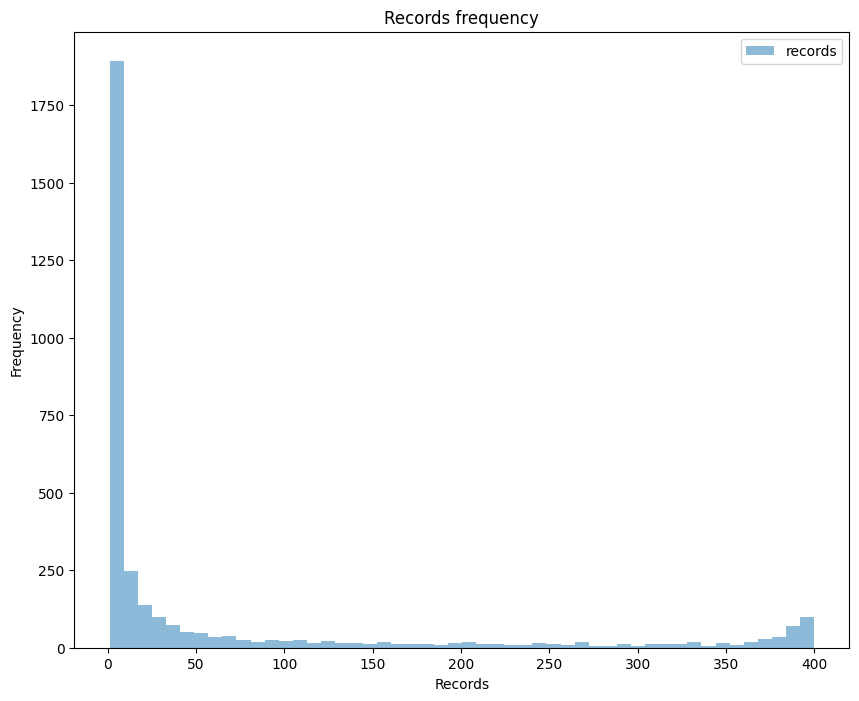

In [13]:
plt.figure(figsize=(10, 8))
plt.hist(data['records'], bins=50, alpha=0.5, label='records')


plt.xlabel('Records')
plt.ylabel('Frequency')
plt.title('Records frequency')
plt.legend()
plt.show()

More accurate histogram for the most frequent values:

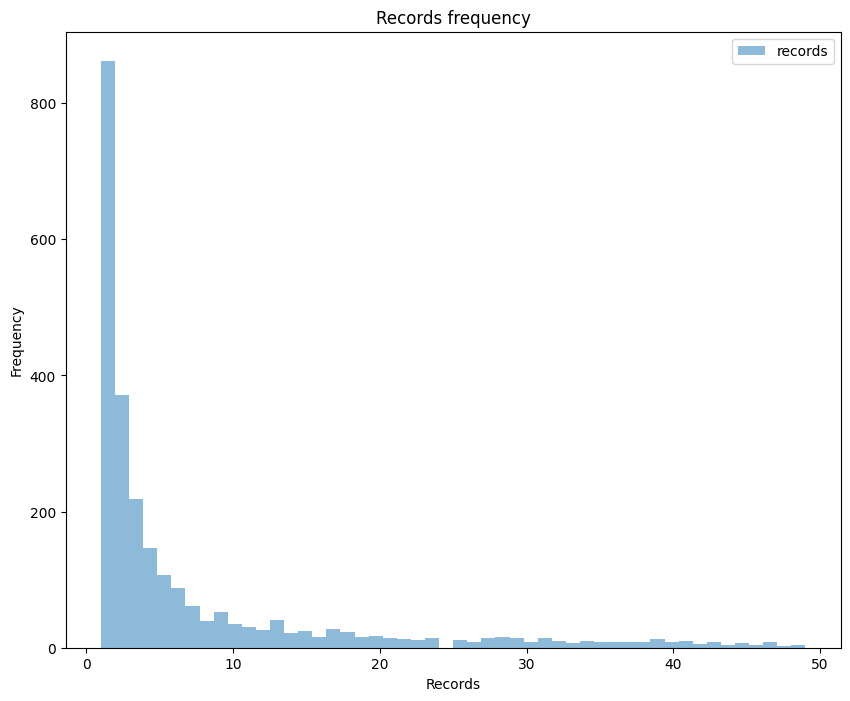

In [14]:
plt.figure(figsize=(10, 8))
filtered_values = data['records'][data['records'] < 50]
plt.hist(filtered_values, bins=50, alpha=0.5, label='records')


plt.xlabel('Records')
plt.ylabel('Frequency')
plt.title('Records frequency')
plt.legend()
plt.show()

Number of different languages the game was streamed in

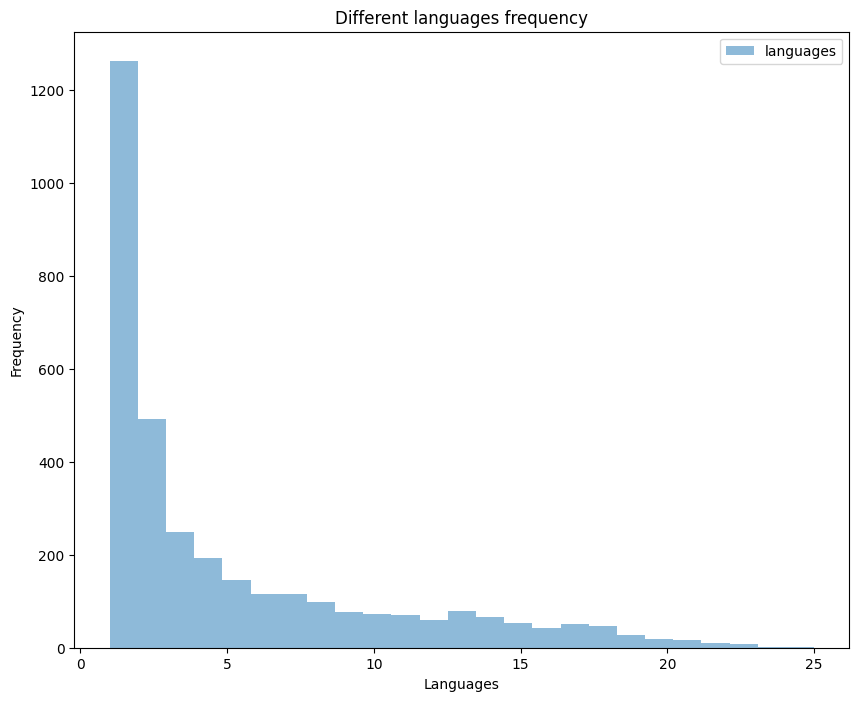

In [15]:
plt.figure(figsize=(10, 8))
plt.hist(data['languages'], bins=25, alpha=0.5, label='languages')


plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Different languages frequency')
plt.legend()
plt.show()

There is no need to do more accurate histogram for this data.

Number of appearances of the game in top rank:

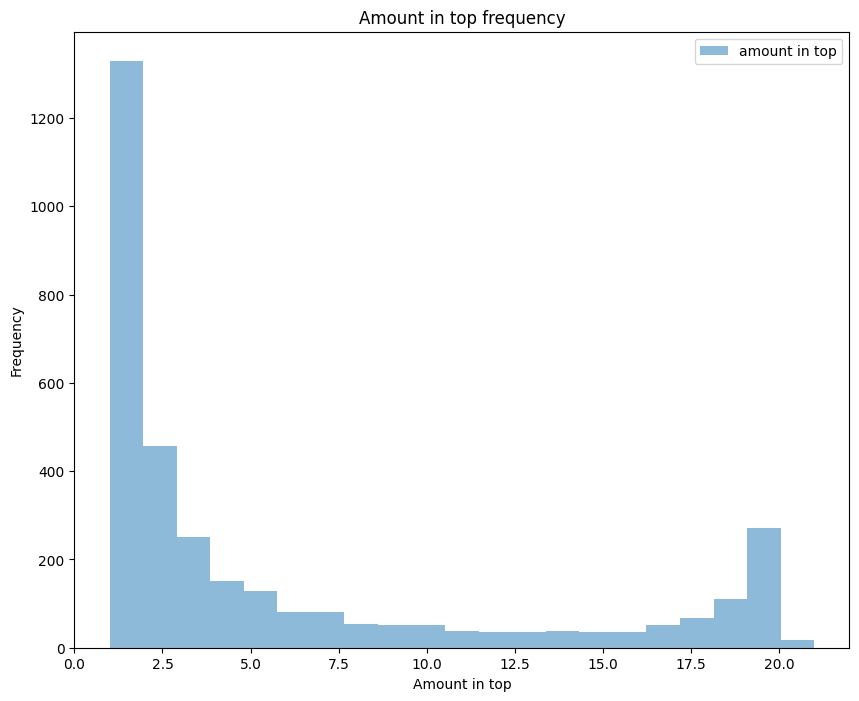

In [16]:
plt.figure(figsize=(10, 8))
plt.hist(data['amount in top'], bins=21, alpha=0.5, label='amount in top')


plt.xlabel('Amount in top')
plt.ylabel('Frequency')
plt.title('Amount in top frequency')
plt.legend()
plt.show()

There is no need to do more accurate histogram for this data.

Data dependency:

<Axes: >

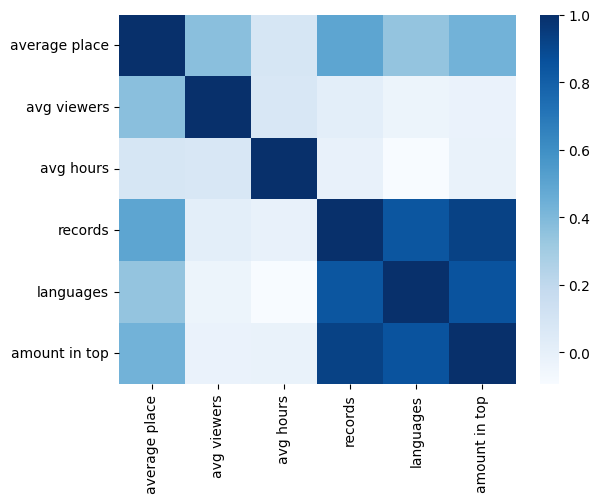

In [17]:
"""
For the purpose of creating a heatmap, 
I reverse the order of 'average place' values
so that a higher value carries greater significance.
"""
copied_data = data.copy()
copied_data['average place'] = max(data['average place']) - copied_data['average place']
corr_matrix = copied_data[['average place','avg viewers','avg hours', 'records','languages','amount in top']].corr()


sns.heatmap(corr_matrix, cmap="Blues")

According to the heatmap, the highest correlation with the ranking position is observed with the parameters 'records' and 'amount in top'.

Plots depicting the relationship between ranking position and 'records' and 'amount in top':

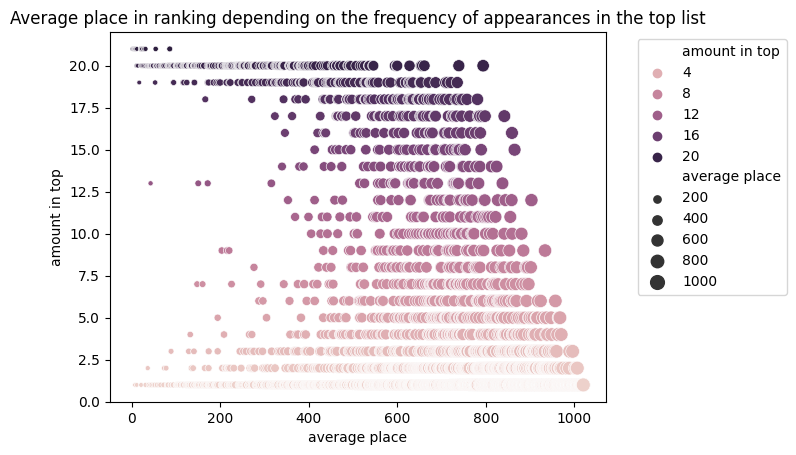

In [18]:
sns.scatterplot(
    x='average place',
    y='amount in top',
    data=data,
    hue='amount in top',
    size='average place',
    sizes=(10, 100),
    legend='brief',
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Average place in ranking depending on the frequency of appearances in the top list")
plt.show()

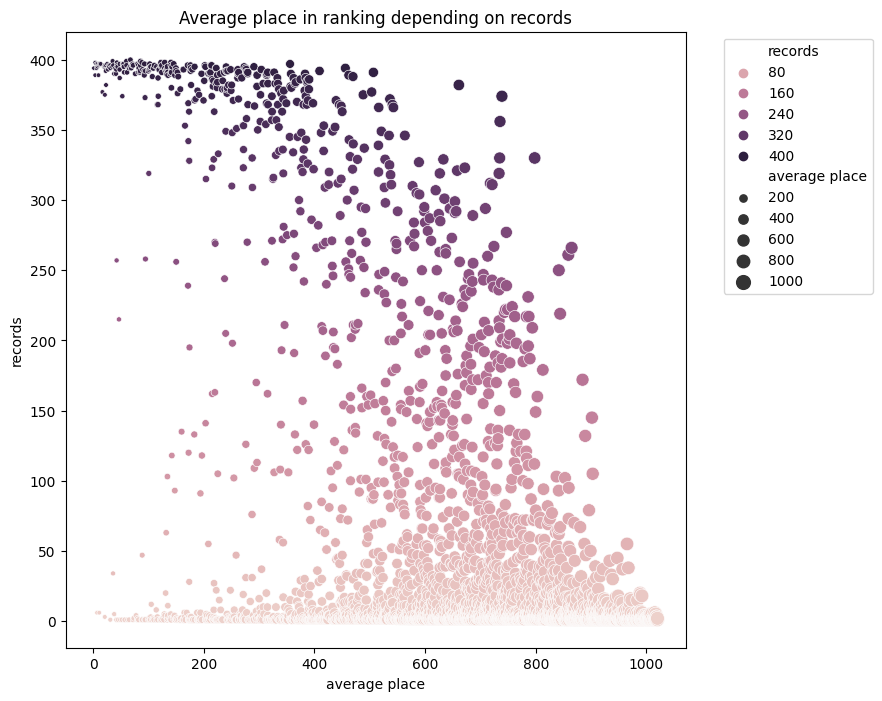

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x='average place',
    y='records',
    data=data,
    hue='records',
    size='average place',
    sizes=(10, 100),
    legend='brief',
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Average place in ranking depending on records")
plt.show()

Despite the higher correlation, it is difficult to determine linear relationships based on the graph.

# Creating model:

I have decided to use the random forest model due to the large number of variables and the lack of variables that stand out significantly compared to the others. 

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [21]:
# The division into independent variables (X) and dependent variable (y).
X = data[['records', 'languages', 'avg viewers', 'avg hours', 'amount in top']]
y = data['average place']

In [22]:
# The division into testing data set and training data set.
# I decided to set the parameter 'random_state' to 42, because this allows me to maintain the same division every time I compile the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

I use Grid Search alghoritm to find the best parameters to use to my model.

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # amount of trees in forest
    'max_depth': [None, 5, 10, 20],  # max depth of tree 
    'min_samples_split': [2, 5, 10, 15],  # min samples
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Model fitting using Grid Search on training data
grid_search.fit(X_train, y_train)

# Best parameters found by Grid Search
best_params = grid_search.best_params_
# Best model found by Grid Search
best_model = grid_search.best_estimator_

# Predicting the popularity of the game for test data using the best model
predictions = best_model.predict(X_test)

I use Mean Squared Error (MSE) and R^2 score to evaluate the model's quality.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R^2 score:", r2)
print("Best params:", best_params)

MSE: 9092.581521379341
R^2 score: 0.8641539347410798
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}


Checking importance of specific features:

In [33]:
# Importance of features
feature_importance = best_model.feature_importances_

# Creating a dataframe with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sorting the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Displaying features with their importances
print(feature_importance_df)

         Feature  Importance
2    avg viewers    0.580391
4  amount in top    0.233319
0        records    0.145263
3      avg hours    0.027910
1      languages    0.013118


Comparing results to different models:

In [34]:
from sklearn.svm import SVR

# Inicjalizacja modelu
model = SVR(kernel='linear')  # Ustawienie jądra (kernel)


parameters = {'C': [1.0, 2.0, 4.0], 
              'gamma': [0.001, 0.1, 1., 10.]
             }

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

# Model fitting using Grid Search on training data
grid_search.fit(X_train, y_train)

# Best parameters found by Grid Search
best_params = grid_search.best_params_

# Best model found by Grid Search
best_model = grid_search.best_estimator_

# Predicting the popularity of the game for test data using the best model
predictions = best_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R^2 score:", r2)
print("Best params:", best_params)

MSE: 48700.54323092451
R^2 score: 0.2723983658175193
Best params: {'C': 4.0, 'gamma': 0.001}
